# Trees (Graphs)

In this reading (<a href="lec-10-graphs.ipynb">notebook version</a>), we'll learn about generally about *graphs*, and more specifically about a special kind of graph, the *tree*.

By the end, you should be comfortable with the following terms:
* graph
* node
* edge
* metadata
* path
* connected
* cycle
* directed graph
* parent/child
* DAG (directed acyclic graph)
* tree
* root
* leaf
* binary tree

## Setup

To follow these examples, you'll need graphviz (https://www.graphviz.org/) installed on your VM.  The graphviz program is called `dot`.  SSH to your VM and try running it:

```
trh@instance-1:~$ dot -V

Command 'dot' not found, but can be installed with:

apt install graphviz
Please ask your administrator.
```

We don't have it, but Ubuntu is helpfully telling us how to install it (with `apt ...`)!  We'll take their suggestion, but use `sudo` so we can install as root (the name for the admin user):

```
sudo apt install graphviz
```

Let's try again and confirm that we can see the installed version:

```
trh@instance-1:~$ dot -V
dot - graphviz version 2.40.1 (20161225.0304)
```

Great!  You'll also need to install the graphviz package for Python so that we can write code to generate graphs (instead of creating them manually).

```
pip3 install graphviz
```

# Examples of Graphs

* https://wisc-ds-projects.github.io/f19/past/langston-ellen-zan.pdf#page=22
* https://www.reddit.com/r/dataisbeautiful/comments/1q7b3s/voting_relationships_between_senators_in_the/
* facebook.com/notes/facebook-engineering/visualizing-friendships/469716398919/
* https://commons.wikimedia.org/wiki/File:The_Ancestors_Tale_Mammals_Phylogenetic_Tree_in_mya.png
* https://arxiv.org/pdf/1611.01890.pdf#page=14
* https://www.oreilly.com/library/view/git-pocket-guide/9781449327507/ch01.html#fig0101

## Nodes and Edges

First let's import a couple things from graphviz.  Note that we'll only use graphviz for visualization -- we'll be creating our own classes to represent graphs efficiently.

In [1]:
from graphviz import Digraph, Graph

Graphs have nodes and edges.  Here's a graph with just one *node* (also called a *vertex*):

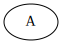

In [2]:
g = Graph()
g.node("A")
g

In graphviz, nodes have names and labels.  If you pass one argument, they're the same.  Alternatively, lets make the name "A" and the label "Madison"

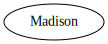

In [3]:
g = Graph()
g.node("A", "Madison")
g

*Edges* connect nodes.  Let's create another node, and an edge to connect them:

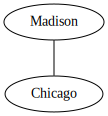

In [4]:
g.node("B", "Chicago")
g.edge("A", "B")
g

Although not common, there's no rule against having multiple edges between the same two nodes, or having an edge connecting a node to itself:

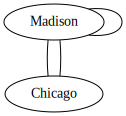

In [5]:
g.edge("A", "B")
g.edge("A", "A")
g

Can you think why you might want multiple edges between the two nodes?

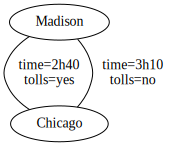

In [6]:
g = Graph()
g.node("A", "Madison")
g.node("B", "Chicago")
g.edge("A", "B", label="time=2h40\ntolls=yes")
g.edge("A", "B", label="time=3h10\ntolls=no", badparam="no error here!")
g

Be careful!  Note above that passing to params that don't exist does not produce an error in graphviz -- it's just ignored.

You can read about what params are supported here: https://www.graphviz.org/doc/info/attrs.html

By each parameter, the "Used By" column tells us what features of the graph support that attribute.  The main ones to watch for are "E" for "edge" and "N" for "node".  For example:

|Name|Used By|Type|Default|Minimum|Notes|
|---|---|---|---|---|---|
|color|ENC|color |colorList|black|
    
This tells us that both edges and nodes accept the color parameter.

The other weird thing is that all arguments must be strings, even numeric data.

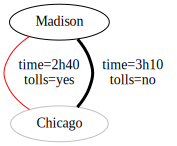

In [7]:
g = Graph()
g.node("A", "Madison")
g.node("B", "Chicago", color="gray")
g.edge("A", "B", label="time=2h40\ntolls=yes", color="red")
g.edge("A", "B", label="time=3h10\ntolls=no", penwidth="3")
g

Whether it affects the visual display or not, there is often a lot of *metadata* associated with nodes and edges.  For example, consider the friendship (an edge) between you and another person (two nodes).

Node metadata: name, birthdate, SSN, address, phone, ...

Edge metadata: when you became friends, messages exchanged, the type of relationship (work, social, etc)

The variety of metadata that might be needed is one reason to build your own graphs.

## Paths

A sequence of edges to get from one node to another is called a *path*.  For example, B->A->E is one path (but not the only one) for getting from B to E.

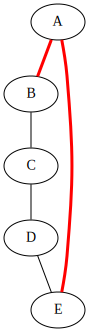

In [8]:
g = Graph()
g.node("A")
g.node("B")
g.node("C")
g.node("D")
g.node("E")
g.edge("A", "B", color="red", penwidth="3")
g.edge("B", "C")
g.edge("C", "D")
g.edge("D", "E")
g.edge("E", "A", color="red", penwidth="3")
g

The above is an example of a *connected* graph -- there's a path between each pair of nodes.  Not all graphs are connected.  E.g., consider the following:

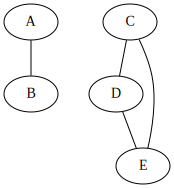

In [9]:
g = Graph()
g.node("A")
g.node("B")
g.node("C")
g.node("D")
g.node("E")
g.edge("A", "B")
g.edge("C", "D")
g.edge("D", "E")
g.edge("E", "C")
g

Take a look at https://en.wikipedia.org/wiki/Path_(graph_theory) to see other ways paths (and similar structures) are commonly defined.

A *cycle* is a path that forms a loop back to the original node (without reusing the same edges).  The red path is cycle:

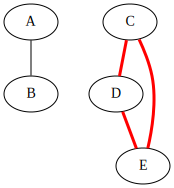

In [10]:
g = Graph()
g.node("A")
g.node("B")
g.node("C")
g.node("D")
g.node("E")
g.edge("A", "B")
g.edge("C", "D", color="red", penwidth="3")
g.edge("D", "E", color="red", penwidth="3")
g.edge("E", "C", color="red", penwidth="3")
g

## Directed Graphs

*Directed graphs* have special edges with a direction.  For example, imagine nodes are street intersections.  Some intersections are connected by one-way streets.  We can create directed graphs with `Digraph`:

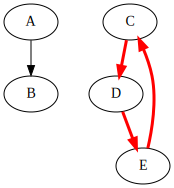

In [11]:
g = Digraph() # only line changed from last example!
g.node("A")
g.node("B")
g.node("C")
g.node("D")
g.node("E")
g.edge("A", "B")
g.edge("C", "D", color="red", penwidth="3")
g.edge("D", "E", color="red", penwidth="3")
g.edge("E", "C", color="red", penwidth="3")
g

The above still has a cycle, but the following is not a cycle, given the direction of the arrows:

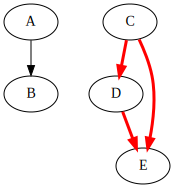

In [12]:
g = Digraph()
g.node("A")
g.node("B")
g.node("C")
g.node("D")
g.node("E")
g.edge("A", "B")
g.edge("C", "D", color="red", penwidth="3")
g.edge("D", "E", color="red", penwidth="3")
g.edge("C", "E", color="red", penwidth="3") # only change: flip C and E
g

With directed graphs, we often use parent/child terminology.

For example, node C has two children: D and E.

E has two parents: C and D.

# Directed Acyclic Graphs

DAGs are directed graphs without cycles in them.  The directed graph show above is a DAG because it doesn't have any cycles.

DAGs show up all the time in practice!  Which of the following are examples of DAGs?

1. a network of mutual friends
2. git commits
3. a Python class hierarchy
4. a network of streets in a City

<details>
<summary>Answers</summary>
Only (2) and (3) are DAGs
</details>

# Trees

*Directed graphs* are a kind of *graph*

*DAGs* are a kind of *directed graph*.

*Trees* are a kind of *DAG*.

Trees have these additional restrictions beyond what DAGs require:
* they have exactly one node with no parents, called the *root*
* any additional nodes have exactly one parent

Here's an example of a tree:

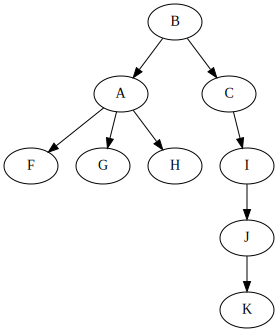

In [13]:
g = Digraph()
g.edge("B", "A")
g.edge("B", "C")
g.edge("A", "F")
g.edge("A", "G")
g.edge("A", "H")
g.edge("C", "I")
g.edge("I", "J")
g.edge("J", "K")
g

Which node is the root in the above tree?

<details>
<summary>Answer</summary>
B
</details>

A leaf is a node with no children.  What are the leaves in the above graph?

<details>
<summary>Answer</summary>
F, G, H, K
</details>

Consider your files, organized as a graph:

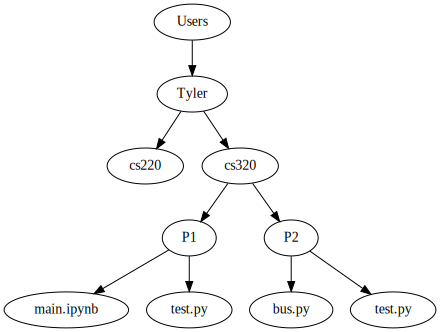

In [14]:
g = Digraph()
g.edge("Users", "Tyler")
g.edge("Tyler", "cs220")
g.edge("Tyler", "cs320")
g.edge("cs320", "P1")
g.edge("cs320", "P2")
g.edge("P1", "main.ipynb")
g.edge("P2", "bus.py")

g.node("p1-test", "test.py")
g.node("p2-test", "test.py")
g.edge("P1", "p1-test")
g.edge("P2", "p2-test")
g

The above is an example of a(n):
1. graph
2. DAG
3. tree
4. all of the above!

<details>
<summary>Answer</summary>
(4) All of the above!  It satisfies all the requirements for being a tree.  Furthemore, a tree is a kind of DAG, and a DAG is a kind of graph.
</details>

## Tree Example

Before we implemented a tree, review the LinkedList class you implemented in lab:

In [15]:
class Node:
    def __init__(self, val):
        self.val = val
        self.next = None

    def __len__(self):
        if self.next == None:
            # base case: I'm the only Node!  Length must be 1
            return 1
        else:
            # recursive case: total length is the length of next plus 1
            raise NotImplemented("recursive case not implemented yet")

    def __repr__(self):
        if self.next == None:
            return repr(self.val)
        else:
            return repr(self.val)+","+repr(self.next)

    def __getitem__(self, idx):
        if idx == 0:
            # base case
            return self.val
        else:
            if self.next == None:
                raise IndexError
            
            # recursive case
            return self.next[idx-1]

L = Node("A")
L2 = Node("B")
L3 = Node("C")
L.next = L2
L2.next = L3
print(L)
for x in L:
    print(x)

'A','B','C'
A
B
C


The above is really a simple form of a graph, like this:

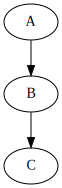

In [16]:
g = Digraph()
g.edge("A", "B")
g.edge("B", "C")
g

Each node is an object of type Node.  What are the edges?  The `next` attribute -- we didn't need to implement a special class for that in this case, though we might have if there were important edge metadata.

To get a tree, we're going to need to have multiple children per node.  For simplicity, lets have at most two (such a tree is called a "binary tree").  Instead of `next`, we'll have `left` and `right`, both of which can reference other nodes.

In [17]:
class Node:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None
    
    def indented_str(self, indent):
        s = "    " * indent + self.val + "\n"
        for child in [self.left, self.right]:
            if child != None:
                s += child.indented_str(indent+1)
        return s
        
    def __str__(self):
        return self.indented_str(0)
    
root = Node("A")
root.left = Node("B")
root.right = Node("C")
print(root)

A
    B
    C



Can we design our tree so that it 

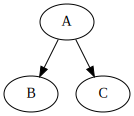

In [18]:
def to_graphviz(self, g=None):
    if g == None:
        g = Digraph()
    g.node(self.val)
    for child in [self.left, self.right]:
        if child != None:
            g.edge(self.val, child.val)
            child.to_graphviz(g)
    return g

# add to_graphviz to Node as a new method.
# this is not good style: https://www.geeksforgeeks.org/monkey-patching-in-python-dynamic-behavior/
# but it means not copy/pasting the above code
Node.to_graphviz = to_graphviz

root.to_graphviz()

Wouldn't it be nice if we could automatically visualize the tree?

In [19]:
root

We can if we implement `_repr_svg_`, like `Graph` does:

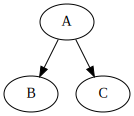

In [20]:
def _repr_svg_(self, g=None):
    return self.to_graphviz()._repr_svg_()
Node._repr_svg_ = _repr_svg_

root